In [1]:
import glob
exp = "09-30_18-53__con001_conScale1_intraLoss_HT21_5e-05"
gpu = 5

files = glob.glob(f"/nfs/home/leo0511/Research/People-Flows/exp/HT21/FT/{exp}/ep*")
for file in files:
    print(f"python test_HT21.py --model_path {file} --GPU_ID {gpu}")

python test_HT21.py --model_path /nfs/home/leo0511/Research/People-Flows/exp/HT21/FT/09-30_18-53__con001_conScale1_intraLoss_HT21_5e-05/ep_5_iter_11000_mae_3.052_mse_3.716_seq_MAE_23.008_WRAE_35.397_MIAE_3.083_MOAE_5.008.pth --GPU_ID 5
python test_HT21.py --model_path /nfs/home/leo0511/Research/People-Flows/exp/HT21/FT/09-30_18-53__con001_conScale1_intraLoss_HT21_5e-05/ep_10_iter_24000_mae_11.005_mse_11.698_seq_MAE_6.883_WRAE_10.588_MIAE_2.353_MOAE_4.266.pth --GPU_ID 5
python test_HT21.py --model_path /nfs/home/leo0511/Research/People-Flows/exp/HT21/FT/09-30_18-53__con001_conScale1_intraLoss_HT21_5e-05/ep_17_iter_44000_mae_12.091_mse_12.646_seq_MAE_1.325_WRAE_2.039_MIAE_1.645_MOAE_3.939.pth --GPU_ID 5
python test_HT21.py --model_path /nfs/home/leo0511/Research/People-Flows/exp/HT21/FT/09-30_18-53__con001_conScale1_intraLoss_HT21_5e-05/ep_10_iter_25000_mae_23.206_mse_23.506_seq_MAE_24.260_WRAE_37.322_MIAE_1.120_MOAE_1.703.pth --GPU_ID 5
python test_HT21.py --model_path /nfs/home/leo0511

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
data1 = torch.tensor([[[0,1,0],[2,0,0],[0,1,2]]])
data2 = torch.Tensor([[[[0,1,0],[0,0,0],[0,1,0]],[[1,0,0],[2,0,0],[0,3,2]],[[0,1,0],[0,0,4],[0,1,2]]],[[[0,1,0],[0,0,1],[0,1,2]],[[1,2,0],[2,0,0],[0,3,2]],[[0,1,0],[0,0,4],[0,1,2]]]])
data3 = torch.zeros_like(data2).squeeze()
print(data2.shape)                  
print(torch.argmax(data2,dim=1))
print(data2)
for scale in range(data3.shape[1]):
    data3[:,scale][torch.where(torch.argmax(data2,dim=1).squeeze()==scale)] = 1
print(data3)

# print(F.softmax(data2,dim=1))


# F.upsample_nearest(data1, scale_factor=2)
F.cross_entropy(data2, data1,reduction='none')


torch.Size([2, 3, 3, 3])
tensor([[[1, 0, 0],
         [1, 0, 2],
         [0, 1, 1]],

        [[1, 1, 0],
         [1, 0, 2],
         [0, 1, 0]]])
tensor([[[[0., 1., 0.],
          [0., 0., 0.],
          [0., 1., 0.]],

         [[1., 0., 0.],
          [2., 0., 0.],
          [0., 3., 2.]],

         [[0., 1., 0.],
          [0., 0., 4.],
          [0., 1., 2.]]],


        [[[0., 1., 0.],
          [0., 0., 1.],
          [0., 1., 2.]],

         [[1., 2., 0.],
          [2., 0., 0.],
          [0., 3., 2.]],

         [[0., 1., 0.],
          [0., 0., 4.],
          [0., 1., 2.]]]])
tensor([[[[0., 1., 1.],
          [0., 1., 0.],
          [1., 0., 0.]],

         [[1., 0., 0.],
          [1., 0., 0.],
          [0., 1., 1.]],

         [[0., 0., 0.],
          [0., 0., 1.],
          [0., 0., 0.]]],


        [[[0., 0., 1.],
          [0., 1., 0.],
          [1., 0., 1.]],

         [[1., 1., 0.],
          [1., 0., 0.],
          [0., 1., 0.]],

         [[0., 0., 0.],
        

ValueError: Expected input batch_size (2) to match target batch_size (1).

tensor([[[[0., 1., 0.],
          [0., 0., 1.],
          [0., 1., 2.]]],


        [[[0., 1., 0.],
          [0., 0., 1.],
          [0., 1., 2.]]],


        [[[0., 1., 0.],
          [0., 0., 1.],
          [0., 1., 2.]]]])

In [26]:
a = torch.Tensor([1,5,3])
print(F.softmax(-a))
print(F.softmax(1/a))



tensor([0.8668, 0.0159, 0.1173])
tensor([0.5095, 0.2289, 0.2616])


/tmp/ipykernel_1079881/1412361636.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(-a))
/tmp/ipykernel_1079881/1412361636.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(1/a))


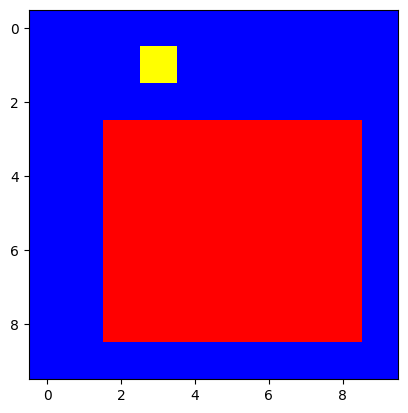

In [16]:
import matplotlib.pyplot as plt
import numpy as np
# data2 = np.reshape(LabelPred,[600,900])
import torch.nn.functional as F
import torch
import cv2


data1 = torch.zeros((1,3,10,10))
data2 = torch.zeros((1,10,10)).long()
data2[0,3:9,2:9] = 1
data2[0,1:2,3:4] = 2

F.cross_entropy(data1,data2)
COLOR_MAP = [
    [255, 0, 0],
    [0, 0, 255],
    [0, 255, 255],
]
COLOR_MAP = np.array(COLOR_MAP, dtype="uint8")


data2 = cv2.cvtColor(COLOR_MAP[np.array(data2)].squeeze(),cv2.COLOR_RGB2BGR)


plt.imshow(data2)
plt.show()

In [9]:
data1

tensor([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          